In [143]:
from hydradx.model.processing import get_omnipool_data, get_binance_orderbook
from hydradx.model.amm.omnipool_amm import OmnipoolState
from hydradx.model.amm.centralized_market import CentralizedMarket
from hydradx.model.amm.agents import Agent

import matplotlib.pyplot as plt

from pprint import pprint
from mpmath import mpf, mp
mp.dps = 50

from hydradxapi import HydraDX


In [144]:

RPC="wss://rpc.hydradx.cloud"
            
asset_list, asset_map, tokens, fees = get_omnipool_data(RPC, archive=False)



In [145]:
binance_ob = get_binance_orderbook(("DOT", "USDT"), archive=False)
pprint(binance_ob)
cex = CentralizedMarket(
    order_book={('DOT', 'USDT'): binance_ob},
    asset_list=["DOT", "USDT"],
    trade_fee=0.001
)

OrderBook(bids=SortedList([[7.029, 73.98], [7.027, 542.58], [7.026, 846.07], [7.025, 579.93], [7.024, 1488.63], [7.023, 1192.21], [7.022, 565.85], [7.021, 430.21], [7.02, 817.85], [7.019, 231.49], [7.018, 2202.59], [7.017, 1604.83], [7.016, 35.66], [7.015, 2478.63], [7.014, 487.81], [7.013, 347.97], [7.012, 459.87], [7.011, 714.72], [7.01, 559.97], [7.009, 1282.93], [7.008, 1.11], [7.007, 740.14], [7.006, 517.5], [7.005, 3332.62], [7.004, 72.43], [7.003, 1034.79], [7.001, 2171.18], [7.0, 2206.68], [6.999, 829.28], [6.998, 118.4], [6.997, 73.76], [6.996, 445.96], [6.995, 3439.63], [6.994, 428.91], [6.993, 3936.46], [6.992, 98.14], [6.991, 106.05], [6.99, 3800.41], [6.989, 1013.01], [6.988, 276.14], [6.987, 260.57], [6.986, 478.84], [6.985, 453.85], [6.984, 313.21], [6.983, 3.05], [6.982, 73.5], [6.981, 37.03], [6.98, 976.21], [6.979, 7060.47], [6.978, 0.83], [6.977, 1.99], [6.976, 4.91], [6.975, 12.14], [6.974, 3.29], [6.972, 1.2], [6.971, 4072.19], [6.97, 602.79], [6.969, 2173.62], [6.

In [146]:
cex_spot = (cex.order_book[('DOT', 'USDT')].bids[0][0] + cex.order_book[('DOT', 'USDT')].asks[0][0]) / 2


usdt_data = tokens["USDT"]
usd_scale = mpf(5)
overall_scale = mpf(1000)
usdt_lrna = usdt_data['LRNA'] * usd_scale * overall_scale
dot_liquidity = tokens['DOT']['liquidity'] * overall_scale
dot_lrna = tokens['DOT']['LRNA'] * overall_scale
usdt_liquidity = cex_spot * usdt_lrna * dot_liquidity / dot_lrna
usdt_data_up = {'LRNA': usdt_lrna, 'liquidity': usdt_liquidity}
hdx_data = {'LRNA': tokens['HDX']['LRNA'] * overall_scale, 'liquidity': tokens['HDX']['liquidity'] * overall_scale}
dot_data = {'LRNA': dot_lrna, 'liquidity': dot_liquidity}

op_state = OmnipoolState(
    tokens={"USDT": usdt_data_up, "DOT": dot_data, "HDX": hdx_data},
    preferred_stablecoin="USDT",
    lrna_fee=0.0005,
    asset_fee=0.0025
)

    
pprint(op_state)
print(op_state.liquidity)

Omnipool: omnipool
********************************
tvl cap: inf
lrna fee:

    USDT: 0.05%
    DOT: 0.05%
    HDX: 0.05%

asset fee:

    USDT: 0.25%
    DOT: 0.25%
    HDX: 0.25%

asset pools: (

    *USDT*
    asset quantity: 12623096434.035534
    lrna quantity: 381443691.710241
    USD price: 1.0
    tvl: $12623096434.035534
    weight: 381443691.710241/490069968.07049704 (0.7783453722170749)
    weight cap: 1
    total shares: 12623096434.035533555408904888334468644433538528744
    protocol shares: 12623096434.035533555408904888334468644433538528744

    *DOT*
    asset quantity: 407426705.27699757
    lrna quantity: 86544298.92600611
    USD price: 7.0295
    tvl: $2864006024.744655
    weight: 86544298.92600611/490069968.07049704 (0.1765958017520401)
    weight cap: 1
    total shares: 407426705.2769975853152573108673095703125
    protocol shares: 407426705.2769975853152573108673095703125

    *HDX*
    asset quantity: 102431787000.54106
    lrna quantity: 22081977.434249897
  

In [147]:
op_spot = op_state.price(op_state, "DOT", "USDT")
pprint(op_spot)
pprint(cex_spot)
pprint((cex.order_book[('DOT', 'USDT')].bids[0][0],cex.order_book[('DOT', 'USDT')].asks[0][0]))
pprint((cex.order_book[('DOT', 'USDT')].asks[0][0] - cex.order_book[('DOT', 'USDT')].bids[0][0])/cex.order_book[('DOT', 'USDT')].bids[0][0])

mpf('7.0295000000000005258016244624741375446319580078125')
7.0295000000000005
(7.029, 7.03)
0.00014226774790159822


'DEX'
'CEX'


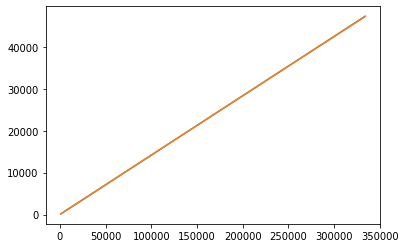

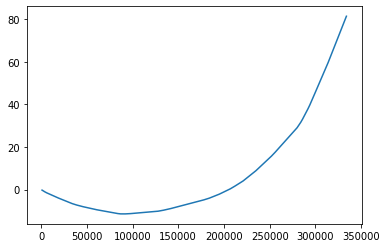

{('DOT', 'USDT'): OrderBook(bids=SortedList([[7.029, 73.98], [7.027, 542.58], [7.026, 846.07], [7.025, 579.93], [7.024, 1488.63], [7.023, 1192.21], [7.022, 565.85], [7.021, 430.21], [7.02, 817.85], [7.019, 231.49], [7.018, 2202.59], [7.017, 1604.83], [7.016, 35.66], [7.015, 2478.63], [7.014, 487.81], [7.013, 347.97], [7.012, 459.87], [7.011, 714.72], [7.01, 559.97], [7.009, 1282.93], [7.008, 1.11], [7.007, 740.14], [7.006, 517.5], [7.005, 3332.62], [7.004, 72.43], [7.003, 1034.79], [7.001, 2171.18], [7.0, 2206.68], [6.999, 829.28], [6.998, 118.4], [6.997, 73.76], [6.996, 445.96], [6.995, 3439.63], [6.994, 428.91], [6.993, 3936.46], [6.992, 98.14], [6.991, 106.05], [6.99, 3800.41], [6.989, 1013.01], [6.988, 276.14], [6.987, 260.57], [6.986, 478.84], [6.985, 453.85], [6.984, 313.21], [6.983, 3.05], [6.982, 73.5], [6.981, 37.03], [6.98, 976.21], [6.979, 7060.47], [6.978, 0.83], [6.977, 1.99], [6.976, 4.91], [6.975, 12.14], [6.974, 3.29], [6.972, 1.2], [6.971, 4072.19], [6.97, 602.79], [6.

In [148]:
agent = Agent(holdings={"USDT": mpf(10000000), "DOT": mpf(10000000)})
trade_size_list = [1000*i for i in range(1, 335)]
dot_out_cex = []
dot_out_dex = []
for trade_size in trade_size_list:
    temp_op_state = op_state.copy()
    temp_cex_state = cex.copy()
    temp_agent1 = agent.copy()
    temp_agent2 = agent.copy()
    temp_op_state.swap(temp_agent1, tkn_buy="DOT", tkn_sell="USDT", sell_quantity=trade_size)
    temp_cex_state.swap(temp_agent2, tkn_buy="DOT", tkn_sell="USDT", sell_quantity=trade_size)
    dot_out_dex.append(temp_agent1.holdings["DOT"] - agent.holdings["DOT"])
    dot_out_cex.append(temp_agent2.holdings["DOT"] - agent.holdings["DOT"])
    # pprint(trade_size)
    # pprint(temp_op_state.price(temp_op_state, "DOT", "USDT"))
    
pprint("DEX")
plt.plot(trade_size_list, dot_out_dex, label="DEX")
# pprint(dot_out_dex)

pprint("CEX")
# pprint(dot_out_cex)
plt.plot(trade_size_list, dot_out_cex, label="CEX")
plt.show()

diffs = [dot_out_dex[i] - dot_out_cex[i] for i in range(len(dot_out_dex))]
plt.plot(trade_size_list, diffs, label="DEX - CEX")
plt.show()

print(cex.order_book)

In [149]:
print((cex.order_book[('DOT', 'USDT')].bids[-1],cex.order_book[('DOT', 'USDT')].asks[-1]))

([6.927, 6.41], [7.129, 1.91])


In [150]:
print(dot_out_cex[-1])

47283.3461864339260500855743885040283203125
